EXERCISE 1

The goal of simulated annealing is to maximize the performance of a model
relative to a fitness function defined over the model parameters you are seeking to
optimize. In Exercise 2, you will apply simulated annealing coded in scipy to
a one-dimensional problem in which you seek the value of X that maximizes the
output of a function called fitnessFunction. But first you must write code that
implements the function, which is the product of m and n:
m = 1+ cos(0.04v)2
n = exp(−v2 /(20000))

In [333]:
import math

def fitnessFunction(v):
    m = 1 + math.cos(0.04*v)**2
    n = math.exp(-v**2 /(20000))
    return m*n


EXERCISE 2

Display the fitness surface. To do this, make the wave fitness with 1000 points
starting at x= -500 and ending at x = 500 (using Data > Change Wave Scaling). 
Set the yvalues in fitness to the corresponding value of the fitnessFunction(). 
Display fitness and include the graph in your lab report.

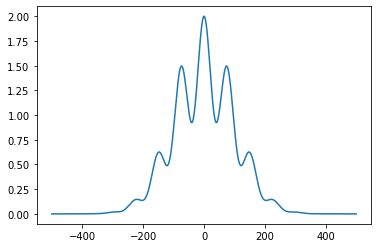

In [334]:
import matplotlib.pyplot as plt
import numpy as np

def graph_fitness():
    v = np.arange(-500., 500., .5)
    fitness = []
    for x in v:
        fitness.append(fitnessFunction(x))
    plt.plot(v,fitness)

graph_fitness()

EXERCISE 3

Run the algorithm with an initial X value of 250 and an initial temperature of 10.
Plot the trajectory of the annealing algorithm along the fitness surface, Include the
graph in your lab report.
Slowly increase the temperature until you find the peak about 90% of the time.
Report this temperature and explain its significance in terms of the relationship
between the search radius and the dimensions of the width of the fitness curve.

EXERCISE 4

Another informative graph is the plot of all the intermediate best fitnesses versus
iteration number. Make this plot. Include the graph in your lab report

88


'final value=0.13440'

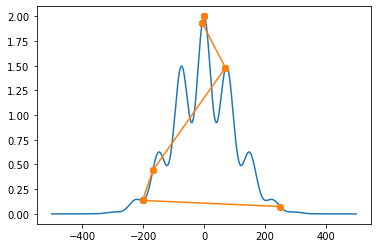

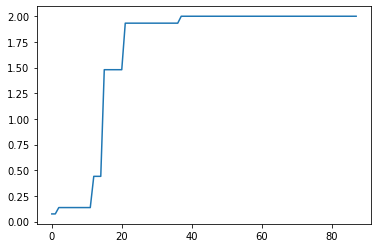

In [351]:
import random

def simulated_annealing(init_state, t0, alpha=0.9, tend=.01, max_nit=20):
    # init state
    t = t0
    current_state = init_state
    oldbest = current_state
    s_st = []
    s_e = []
    s_t = []
    
    while t > tend:
        
        # check if new solution proposed is better than old one
        if fitnessFunction(current_state) > fitnessFunction(oldbest):
            oldbest = current_state
        else:
            current_state = oldbest
            
        # Store values for charts
        s_e.append(fitnessFunction(current_state))
        s_st.append(current_state)
        s_t.append(t)
        
        # run optimization
        nit = 1
        while nit <= max_nit:
            
            next_state = current_state + perturbation(t)
            delta_e = - (fitnessFunction(next_state) - fitnessFunction(current_state))
            if delta_e < 0 or math.exp(-delta_e / t*.05) > random.random():
                current_state = next_state
            nit += 1
            
        # decrease temp
        t = t * alpha
    
    #Create charts
    plt.figure(0)
    graph_fitness()
    plt.plot(s_st,s_e,"-o")
    plt.figure(1)
    plt.plot(s_e)
    print(len(s_e))
    return current_state

def perturbation(t):
    res = 10 * t * random.uniform(-1, 1)
    return res


init_value = 250
init_temp = 100

result = simulated_annealing(init_value, init_temp)
"final value=%.5f" % result

EXERCISE 5

Complete the table below by running simulation 20 times with each of 10 different
values of temp shown. Plot number of failures vs temperature and number of
iterations to reach the peak vs temperature. Describe and explain any trends you
find.

NameError: name 's_st' is not defined